In [2]:
%tensorflow_version 1.x

#랜덤함수로 data 준비
랜덤함수의 경우 x와 y간에 관계가 없음  
입출력 간에 관계가 없는 함수라서 학습이 되지 않음

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import time

60


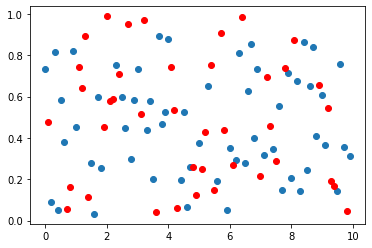

In [6]:
#Data 준비
x=np.arange(0, 10, 0.1)
np.random.shuffle(x)
#y-np.sin(x)
y=np.random.random_sample(x.shape[0])

split_index=int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color='r')



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 4.945517539978027
40/40 [==============================] - 0s 507us/sample - loss: 0.0907 - mean_squared_error: 0.0907
loss= 0.09074879586696624
mse= 0.0907488


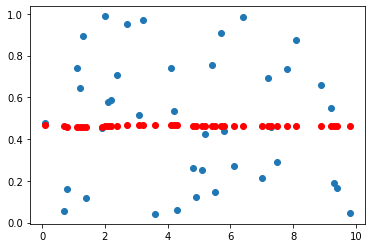

In [7]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()